In [264]:
import cv2 as cv
import sys
import pytesseract
import numpy as np
import matplotlib.pyplot as plt

In [403]:
def load_image(path):
    """Loads image with color"""
    img = cv.imread(path, cv.IMREAD_COLOR)
    if img is None:
        print("Could not open the image")
    else:
        return img
    
def get_contours(img, boxes, path, thre):
    """Receives a image on witch it will find the contours, 
    an image on witch will draw the boxes and path parameters.
    Find the countours, calculate the bounding rectangle then 
    writes it to the path"""
    contours, hierarchy = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
    contours_list = []
    for cnt in contours:
        if cv.contourArea(cnt) >= 500:  
            perimeter = cv.arcLength(cnt, True)
            approx = cv.approxPolyDP(cnt, 0.02*perimeter, True)
            x, y, w, h = cv.boundingRect(approx)
            
            a = x-int(w*0.1)
            b = y-int(h*0.5)
            c = x+w+int(w*0.1)
            d = y+h+int(h*0.2)
            contours_list.append([a, b, c, d])
            cv.rectangle(boxes, (a, b), (c, d), (255, 0, 0), 3)
    
    np.savetxt("output/coordenadas/" + thre + path.split("/")[1][:-4] + ".txt", contours_list)
    
def plot_images(images, titles):
    """Receives a list of images and titles, then plots it"""
    for i in range(5):
        plt.subplot(3,2,i+1)
        plt.imshow(images[i],'gray')
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])
    plt.show()
    
def adptative_threshold(img, path):
    """Receives a image and path parameters. It uses gaussian adptive threshold to  
    binarize the image. Uses erosion and dilation to disconect the character and 
    reconstruct then, then it draws its bounding rectangles"""
    img = cv.resize(img,None,fx=10, fy=10, interpolation = cv.INTER_CUBIC)
    boxes = img.copy()
    img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    
    th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
                cv.THRESH_BINARY_INV,491,26)

    kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(3,3))
    erosion = cv.erode(th3,kernel,iterations = 3)
    
    kernel = cv.getStructuringElement(cv.MORPH_RECT,(3,3))
    dilation = cv.dilate(erosion,kernel,iterations = 3)
    
    edges = cv.Canny(erosion,100,100)
    get_contours(erosion, boxes, path, "adaptive_")
    
    titles = ['Original Image', 'Adaptive Gaussian Thresholding', 'dilation', "erosion", "boxes"]
    images = [img, th3, dilation, erosion, boxes]
    
    boxes = cv.resize(boxes,None,fx=0.5, fy=0.5, interpolation = cv.INTER_CUBIC)
    cv.imwrite("output/images/" + "adaptive_" + path.split("/")[1], boxes)
        
    plot_images(images, titles)
    
    
def otsu_threshold(img):
    """Receives a image and path parameters. It uses otsu's binarization in the image. 
    Uses erosion and dilation to disconect the character and reconstruct then, then 
    it draws its bounding rectangles"""
    img = cv.resize(img,None,fx=10, fy=10, interpolation = cv.INTER_CUBIC)
    boxes = img.copy()
    img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    
    th3 = cv.threshold(img, 95, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)[1]
    
    kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(3,3))
    erosion = cv.erode(th3,kernel,iterations = 3)
    
    kernel = cv.getStructuringElement(cv.MORPH_RECT,(3,3))
    dilation = cv.dilate(erosion,kernel,iterations = 3)
    
    get_contours(erosion, boxes, path, "otsu_")
    
    boxes = cv.resize(boxes,None,fx=0.5, fy=0.5, interpolation = cv.INTER_CUBIC)
    cv.imwrite("output/images/" + "otsu_" + path.split("/")[1], boxes)    
    
    titles = ["Original Image", "Adaptive Gaussian Thresholding", "erosion", "dilation",  "boxes"]
    images = [img, th3, erosion, dilation, boxes]
    
    plot_images(images, titles)


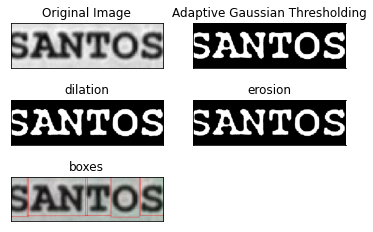

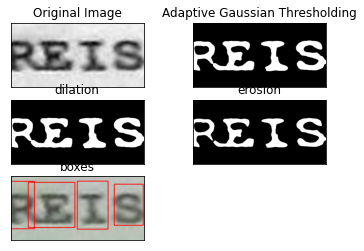

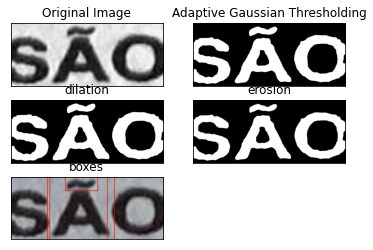

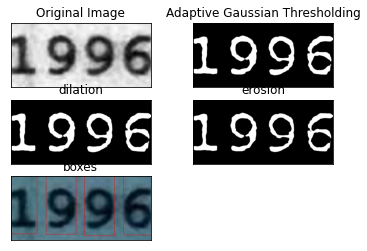

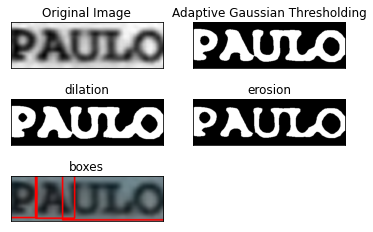

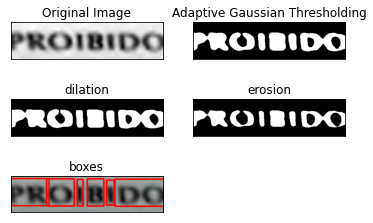

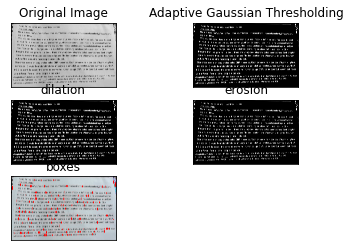

In [404]:
paths = ["images/000892d73d3f54077af2c453272f93eb_56.png", "images/0005e02eab56fa8c2e7be9d144b0297d_54.png",
       "images/0016c3b00256b32cd1780743e5c6d0ec_101.png", "images/ffed5601f04b75983070ea6c6dd30805_48.png",
       "images/00003289bb84f8492c2301f2bc7fa7d5_36.png", "images/0004d959aab660c1ec6f4939f9c2be2e_30.png",
        "images/book2.png"]
for path in paths:
    img = load_image(path)
    adptative_threshold(img, path)

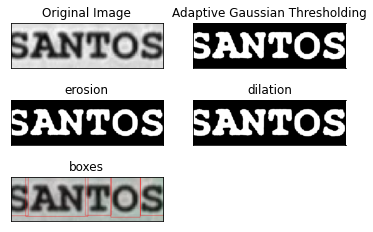

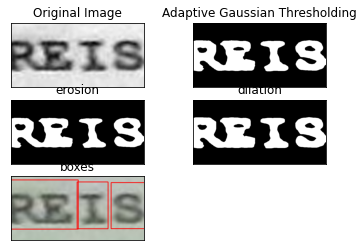

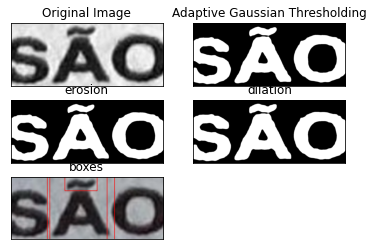

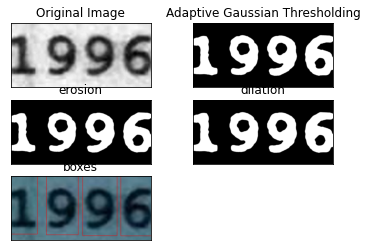

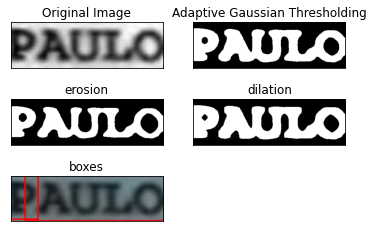

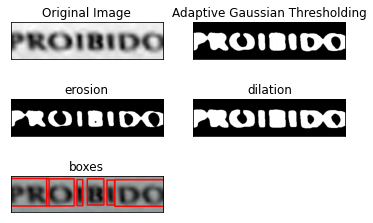

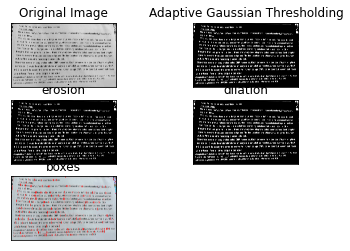

In [405]:
for path in paths:
    img = load_image(path)
    otsu_threshold(img)